In [1]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import * 
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

ModuleNotFoundError: No module named 'torch'

In [2]:
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'



X_train_val_05_70_dir = './data/band_pass_data/X_train_val_05_70.npy'
X_train_val_01_70_dir = './data/band_pass_data/X_train_val_01_70.npy' 
X_train_val_05_70_ds_dir = './data/band_pass_data/X_train_val_downsample_05_70.npy'
X_train_val_01_70_ds_dir = './data/band_pass_data/X_train_val_downsample_01_70.npy' 

X_train_val_05_70 = np.load(X_train_val_05_70_dir)
X_train_val_01_70 = np.load(X_train_val_01_70_dir) 
X_train_val_05_70_ds = np.load(X_train_val_05_70_ds_dir)
X_train_val_01_70_ds = np.load(X_train_val_01_70_ds_dir)

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [2]:
model = EEGCNN(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

NameError: name 'EEGCNN' is not defined

In [34]:
model = EEGCNN(1,4,activation='none').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.394676
0	1.384699	0.272911	1.382025	0.312057	
--Iter 49	1.361636
1	1.378807	0.338022	1.374186	0.338061	
--Iter 49	1.307160
2	1.358815	0.354616	1.348896	0.338061	
--Iter 49	1.376953
3	1.335940	0.371041	1.346940	0.354610	
--Iter 49	1.297454
4	1.332706	0.384013	1.341362	0.342790	
--Iter 49	1.289419
5	1.330236	0.372389	1.342537	0.354610	
--Iter 49	1.318709
6	1.325866	0.385866	1.339784	0.349882	
--Iter 49	1.364635
7	1.323028	0.389993	1.338024	0.359338	
--Iter 49	1.345552
8	1.322380	0.391257	1.340397	0.361702	
--Iter 49	1.334290
9	1.321303	0.389235	1.337466	0.364066	
--Iter 49	1.329317
10	1.319371	0.390330	1.336388	0.361702	
--Iter 49	1.285737
11	1.316739	0.393699	1.335561	0.364066	
--Iter 49	1.306007
12	1.315439	0.397911	1.334094	0.364066	
--Iter 49	1.282941
13	1.314181	0.395553	1.330037	0.368794	
--Iter 49	1.281350
14	1.308447	0.402796	1.321006	0.394799	
--Iter 49	1.299235
15	1.299174	0.426297	1.308381	0.387707	
-

KeyboardInterrupt: 

In [3]:
model = EEGCNNc2(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 50, 22, 976]           1,300
          Identity-2          [-1, 50, 22, 976]               0
            Conv2d-3          [-1, 50, 10, 976]           7,550
       BatchNorm2d-4          [-1, 50, 10, 976]             100
            Conv2d-5          [-1, 80, 10, 952]         100,080
       BatchNorm2d-6          [-1, 80, 10, 952]             160
          Identity-7          [-1, 80, 10, 952]               0
         MaxPool2d-8          [-1, 80, 10, 476]               0
            Linear-9              [-1, 476, 40]          32,040
         Identity-10              [-1, 476, 40]               0
        AvgPool2d-11               [-1, 62, 40]               0
           Linear-12                    [-1, 4]           9,924
          Softmax-13                    [-1, 4]               0
Total params: 151,154
Trainable params:

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.375816
0	1.387553	0.272490	1.375603	0.302600	
--Iter 49	1.312636
1	1.351679	0.348214	1.383480	0.276596	
--Iter 49	1.325610
2	1.339107	0.372810	1.344042	0.373522	
--Iter 49	1.250252
3	1.307082	0.414757	1.318395	0.401891	
--Iter 49	1.256395
4	1.293061	0.426550	1.315865	0.368794	
--Iter 49	1.224592
5	1.258504	0.487113	1.293536	0.420804	
--Iter 49	1.180048
6	1.233064	0.535714	1.267250	0.479905	
--Iter 49	1.217440
7	1.208831	0.552139	1.259006	0.482270	
--Iter 49	1.178719
8	1.209109	0.543379	1.255812	0.482270	
--Iter 49	1.122250
9	1.172039	0.612281	1.213523	0.546099	
--Iter 49	1.231492
10	1.150578	0.636961	1.216585	0.513002	
--Iter 49	1.191237
11	1.137238	0.647827	1.195195	0.586288	
--Iter 49	1.117786
12	1.125924	0.651701	1.189397	0.579196	
--Iter 49	1.187981
13	1.124454	0.656587	1.211439	0.522459	
--Iter 49	1.048476
14	1.104388	0.683373	1.184147	0.569740	
--Iter 49	1.055194
15	1.084114	0.720350	1.176208	0.581560	
-

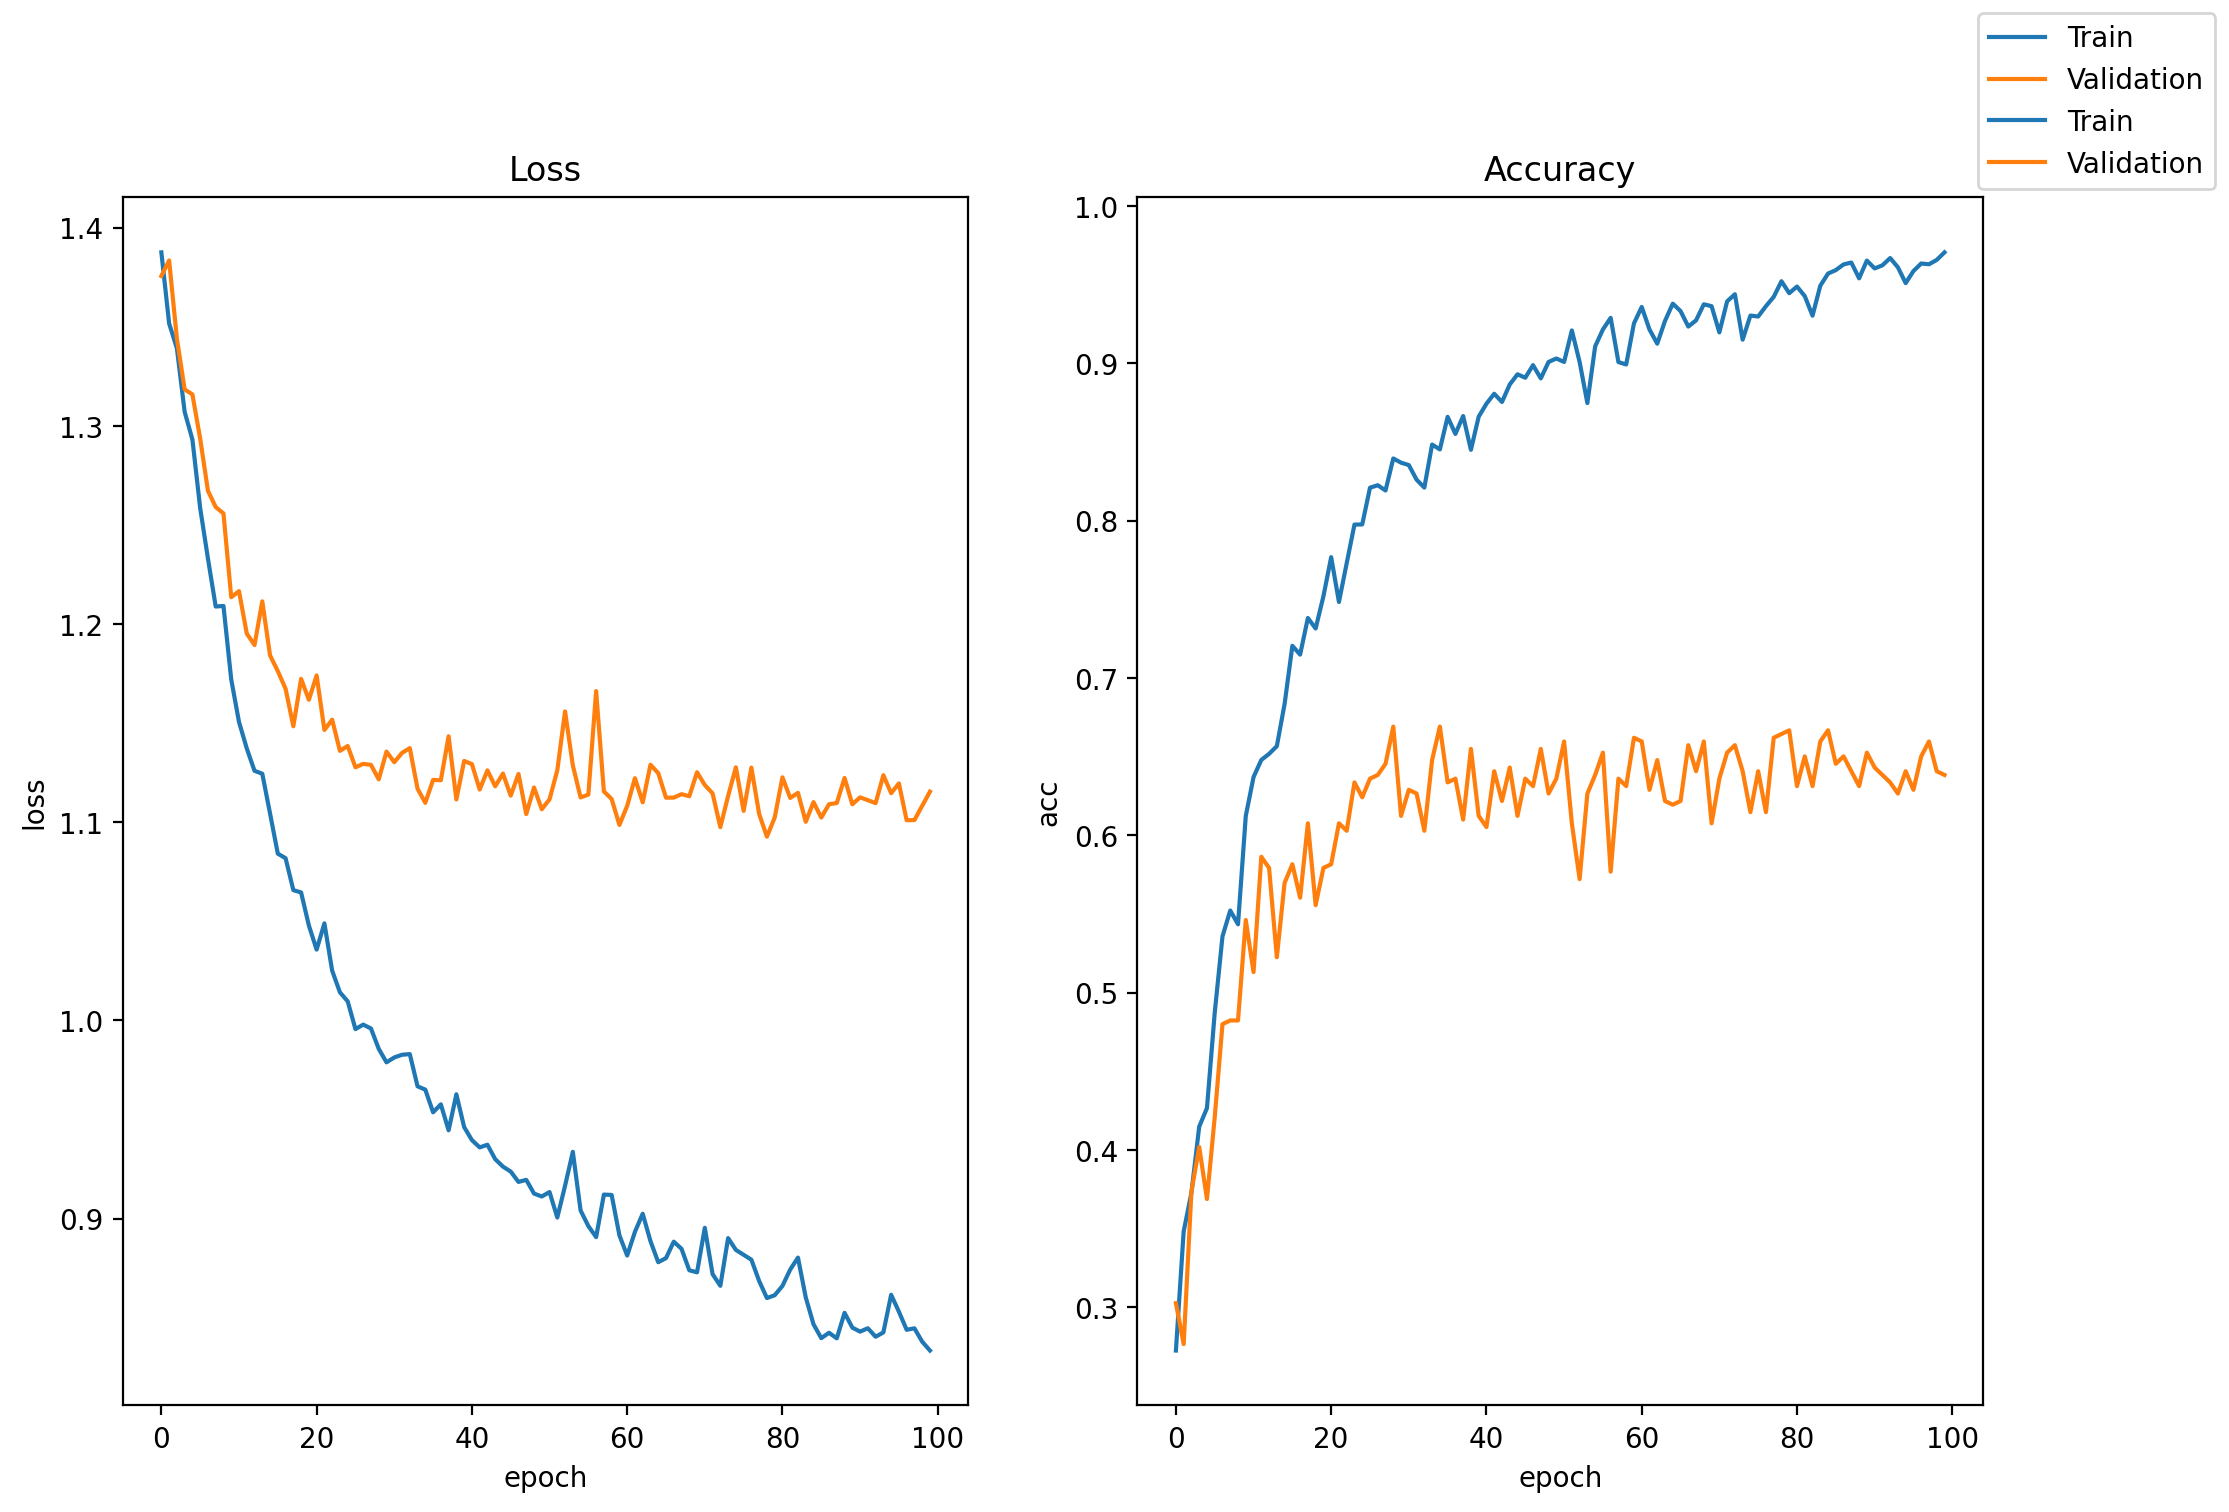

In [92]:
model = EEGCNNc2(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

In [8]:
model = EEGCNNc3(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 40, 22, 976]           1,040
          Identity-2          [-1, 40, 22, 976]               0
            Conv2d-3          [-1, 40, 10, 976]           4,840
       BatchNorm2d-4          [-1, 40, 10, 976]              80
          Identity-5          [-1, 40, 10, 976]               0
         MaxPool2d-6          [-1, 40, 10, 488]               0
            Conv2d-7         [-1, 32, 484, 396]             832
       BatchNorm2d-8         [-1, 32, 484, 396]              64
          Identity-9         [-1, 32, 484, 396]               0
        AvgPool2d-10           [-1, 32, 96, 79]               0
           Conv2d-11           [-1, 64, 94, 77]          18,496
      BatchNorm2d-12           [-1, 64, 94, 77]             128
         Identity-13           [-1, 64, 94, 77]               0
        AvgPool2d-14           [-1, 64,

## EEGCNN3 1 layer fc 

## EEGCNN3 (suqare avgpool log)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.362395
0	1.382756	0.261203	1.378581	0.300236	
--Iter 49	1.357252
1	1.370665	0.316712	1.373280	0.302600	
--Iter 49	1.337763
2	1.355928	0.356469	1.369625	0.314421	
--Iter 49	1.335678
3	1.341963	0.371546	1.367875	0.321513	
--Iter 49	1.358525
4	1.329185	0.400775	1.357589	0.338061	
--Iter 49	1.326530
5	1.318152	0.406334	1.353319	0.340426	
--Iter 49	1.335969
6	1.307845	0.420906	1.345771	0.342790	
--Iter 49	1.298336
7	1.298804	0.428740	1.346086	0.330969	
--Iter 49	1.247235
8	1.293547	0.432193	1.340082	0.352246	
--Iter 49	1.253180
9	1.289093	0.448450	1.332200	0.352246	
--Iter 49	1.327482
10	1.280380	0.463443	1.327924	0.366430	
--Iter 49	1.235587
11	1.275051	0.478858	1.327808	0.380615	
--Iter 49	1.246359
12	1.265739	0.490313	1.311138	0.432624	
--Iter 49	1.174868
13	1.248824	0.523080	1.291060	0.463357	
--Iter 49	1.207403
14	1.232389	0.537736	1.283470	0.446809	
--Iter 49	1.153376
15	1.212680	0.574798	1.257059	0.508274	
-

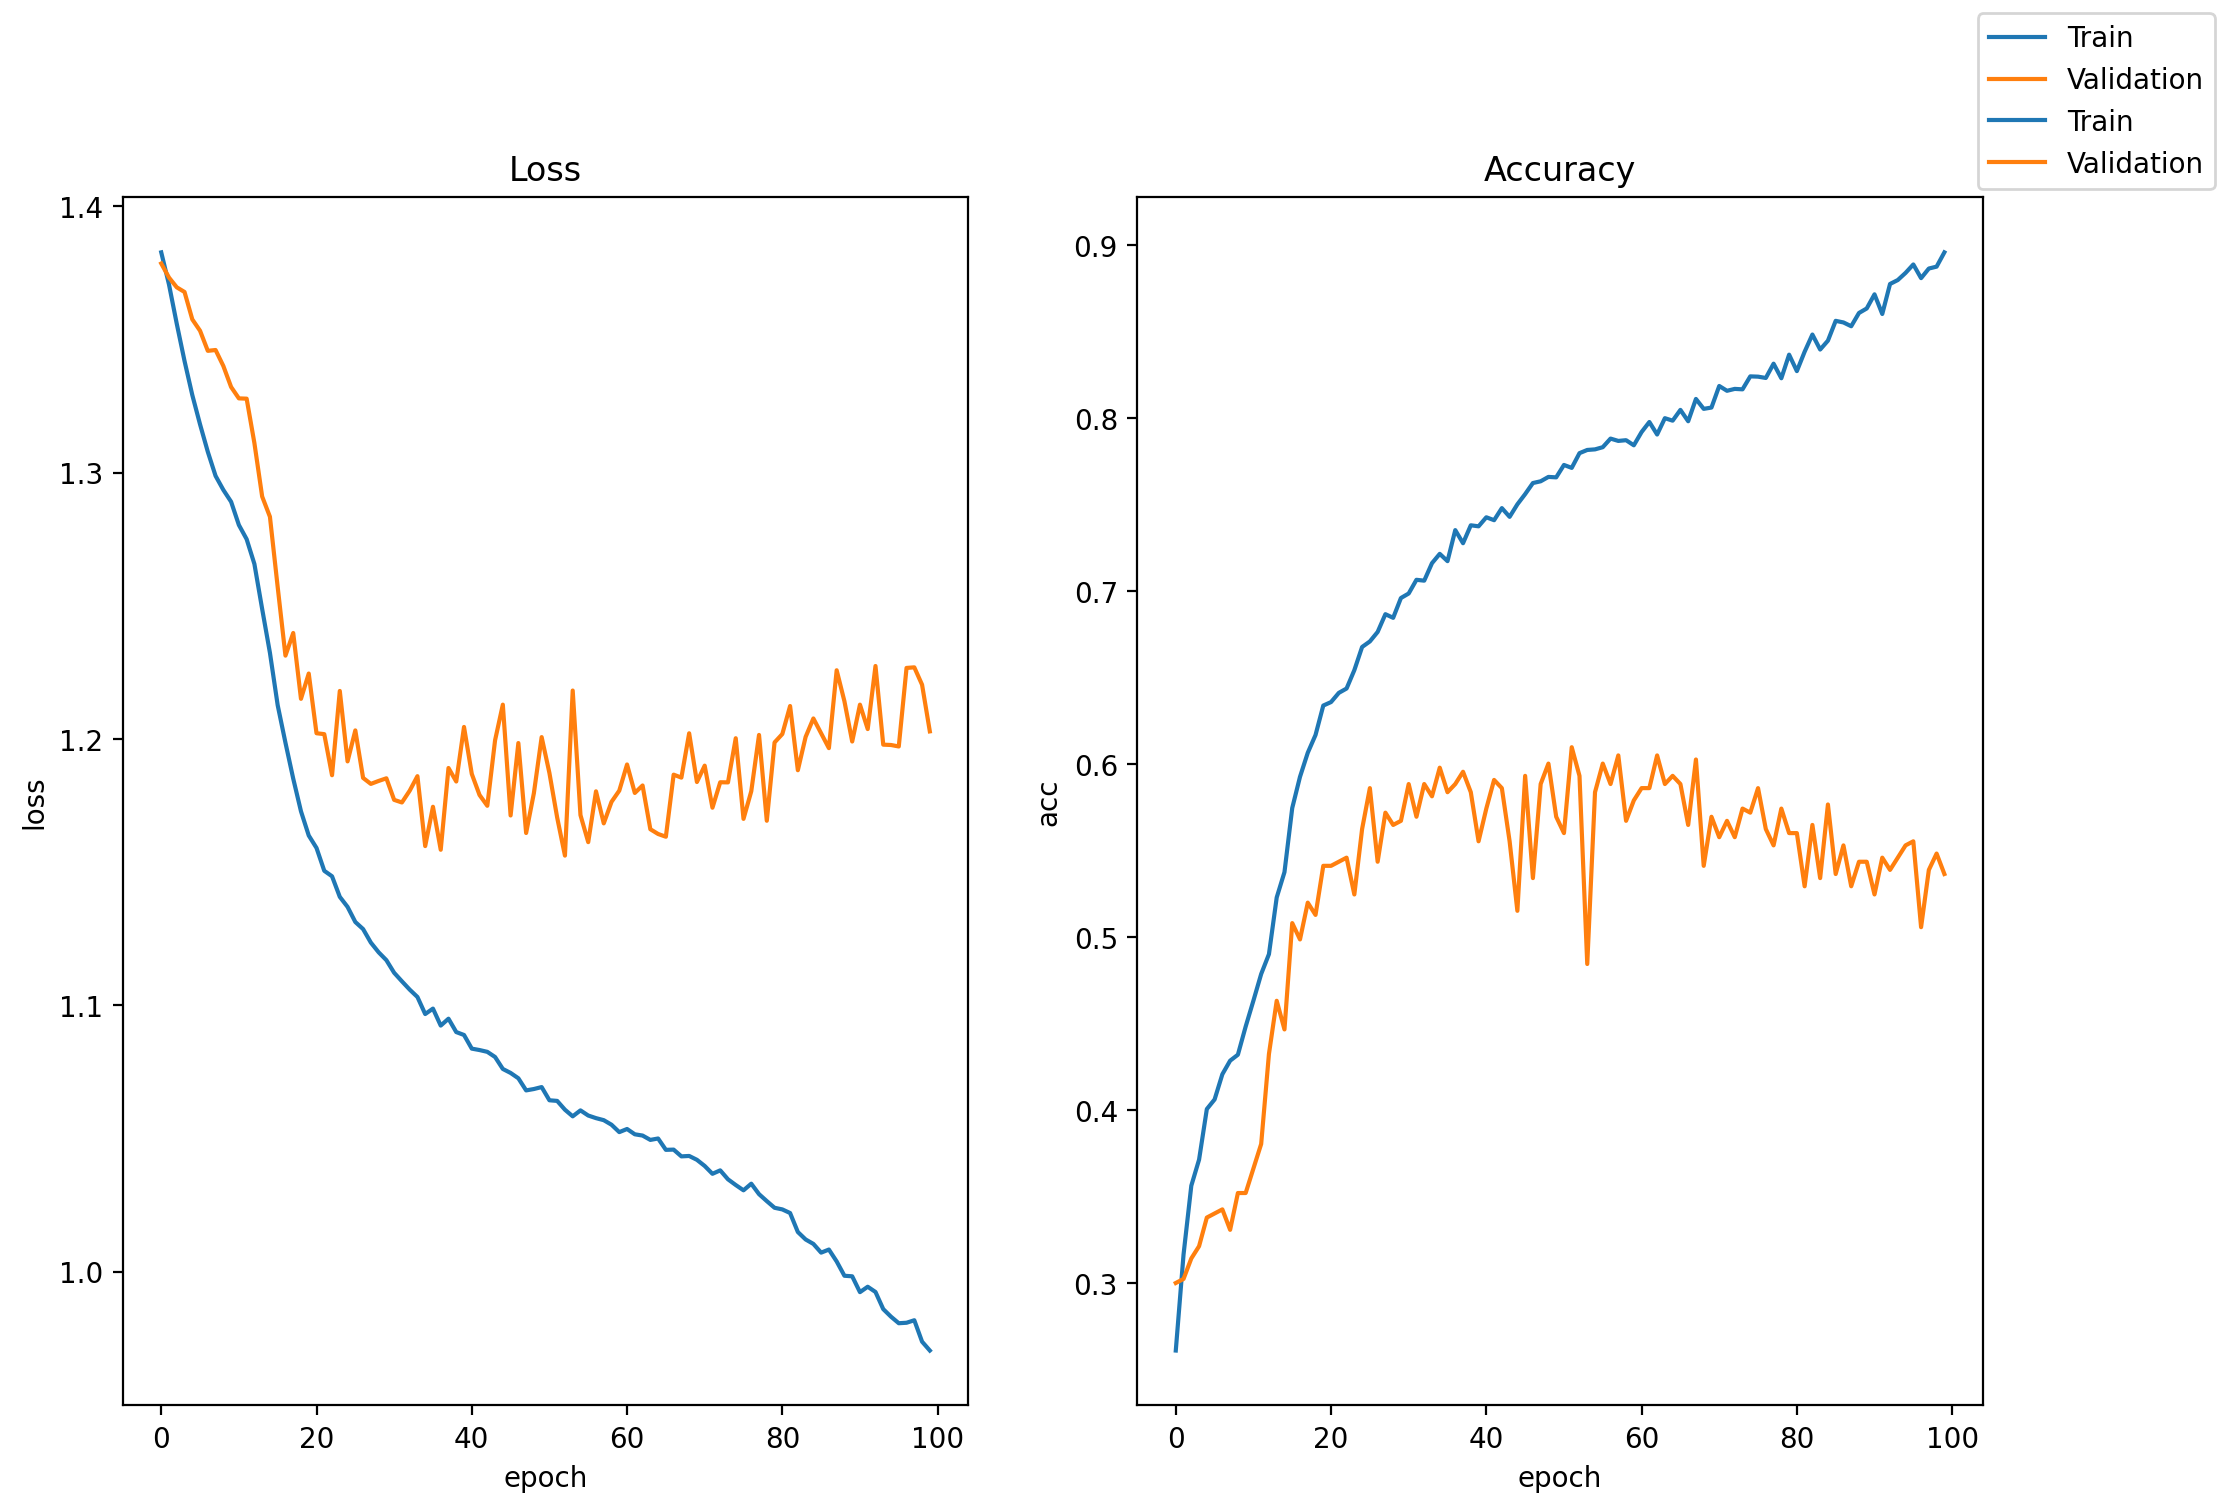

In [10]:
model = EEGCNNc3(1,4,activation='leaky_relu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)


In [13]:
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

The maximum of the validation is: 0.6099290780141844


## EEGCNN3 (no suqare avgpool log)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.360994
0	1.375178	0.284114	1.381151	0.276596	
--Iter 49	1.377957
1	1.354529	0.343918	1.363987	0.328605	
--Iter 49	1.349625
2	1.338114	0.394542	1.358326	0.309693	
--Iter 49	1.326890
3	1.322840	0.402965	1.348947	0.361702	
--Iter 49	1.313001
4	1.313239	0.431520	1.348998	0.335697	
--Iter 49	1.292342
5	1.306659	0.424949	1.342725	0.338061	
--Iter 49	1.328713
6	1.297621	0.434215	1.338541	0.347518	
--Iter 49	1.179719
7	1.287517	0.449208	1.333484	0.352246	
--Iter 49	1.365530
8	1.279278	0.467739	1.326172	0.382979	
--Iter 49	1.210387
9	1.258977	0.508255	1.304243	0.432624	
--Iter 49	1.212140
10	1.239279	0.536557	1.297831	0.465721	
--Iter 49	1.250749
11	1.217135	0.553908	1.281302	0.453901	
--Iter 49	1.145591
12	1.199562	0.580020	1.284186	0.456265	
--Iter 49	1.199598
13	1.185695	0.592402	1.261809	0.482270	
--Iter 49	1.142226
14	1.173322	0.614555	1.258279	0.465721	
--Iter 49	1.131831
15	1.164058	0.622305	1.245977	0.496454	
-

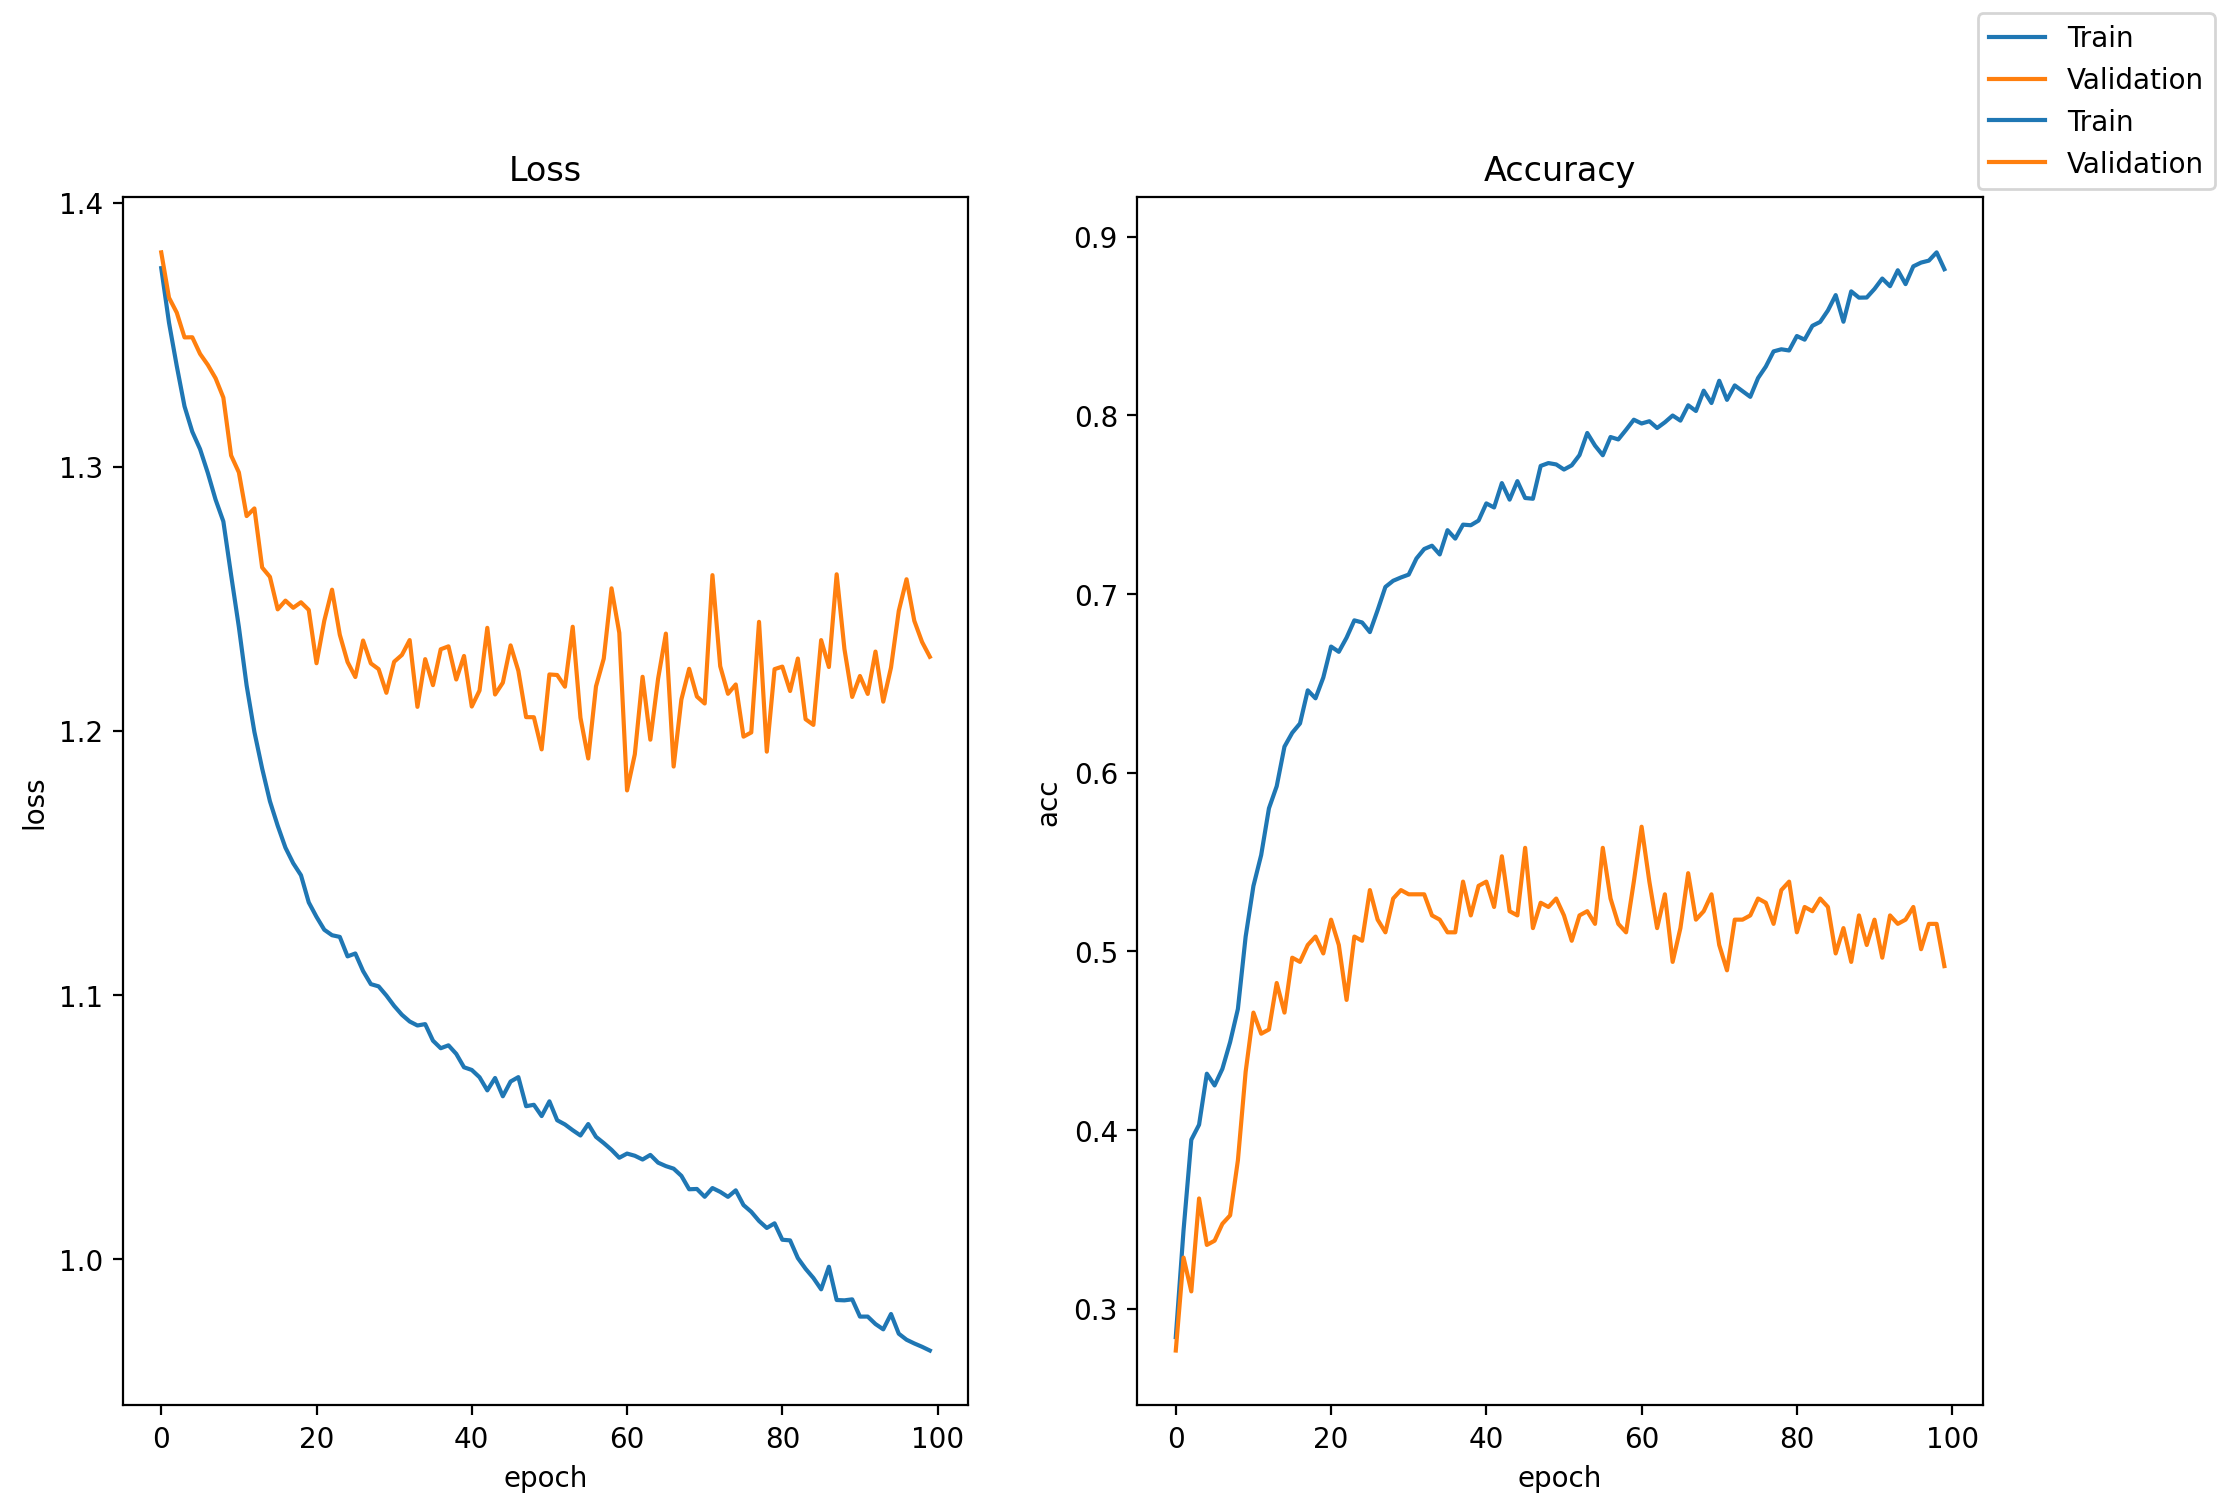

The maximum of the validation is: 0.5697399527186762


In [16]:
model = EEGCNNc3(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 65,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

## 1. maxpool, 2. avgpool, 3 avgpool (no square log)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.365250
0	1.381897	0.282345	1.386835	0.274232	
--Iter 49	1.394419
1	1.368960	0.306520	1.376721	0.283688	
--Iter 49	1.358233
2	1.360790	0.335158	1.370176	0.309693	
--Iter 49	1.370840
3	1.350036	0.360596	1.370677	0.295508	
--Iter 49	1.330797
4	1.339352	0.369525	1.356150	0.338061	
--Iter 49	1.372699
5	1.330672	0.387635	1.353746	0.323877	
--Iter 49	1.293926
6	1.324533	0.391509	1.347804	0.345154	
--Iter 49	1.336884
7	1.315597	0.401280	1.340649	0.356974	
--Iter 49	1.339603
8	1.308039	0.412736	1.337662	0.368794	
--Iter 49	1.290126
9	1.302127	0.421412	1.330615	0.359338	
--Iter 49	1.309305
10	1.295840	0.433625	1.329248	0.368794	
--Iter 49	1.211677
11	1.288515	0.448871	1.325452	0.390071	
--Iter 49	1.243979
12	1.278261	0.460664	1.319686	0.401891	
--Iter 49	1.189420
13	1.265532	0.477763	1.310647	0.392435	
--Iter 49	1.246948
14	1.245410	0.519542	1.279252	0.458629	
--Iter 49	1.191436
15	1.222239	0.557615	1.267521	0.470449	
-

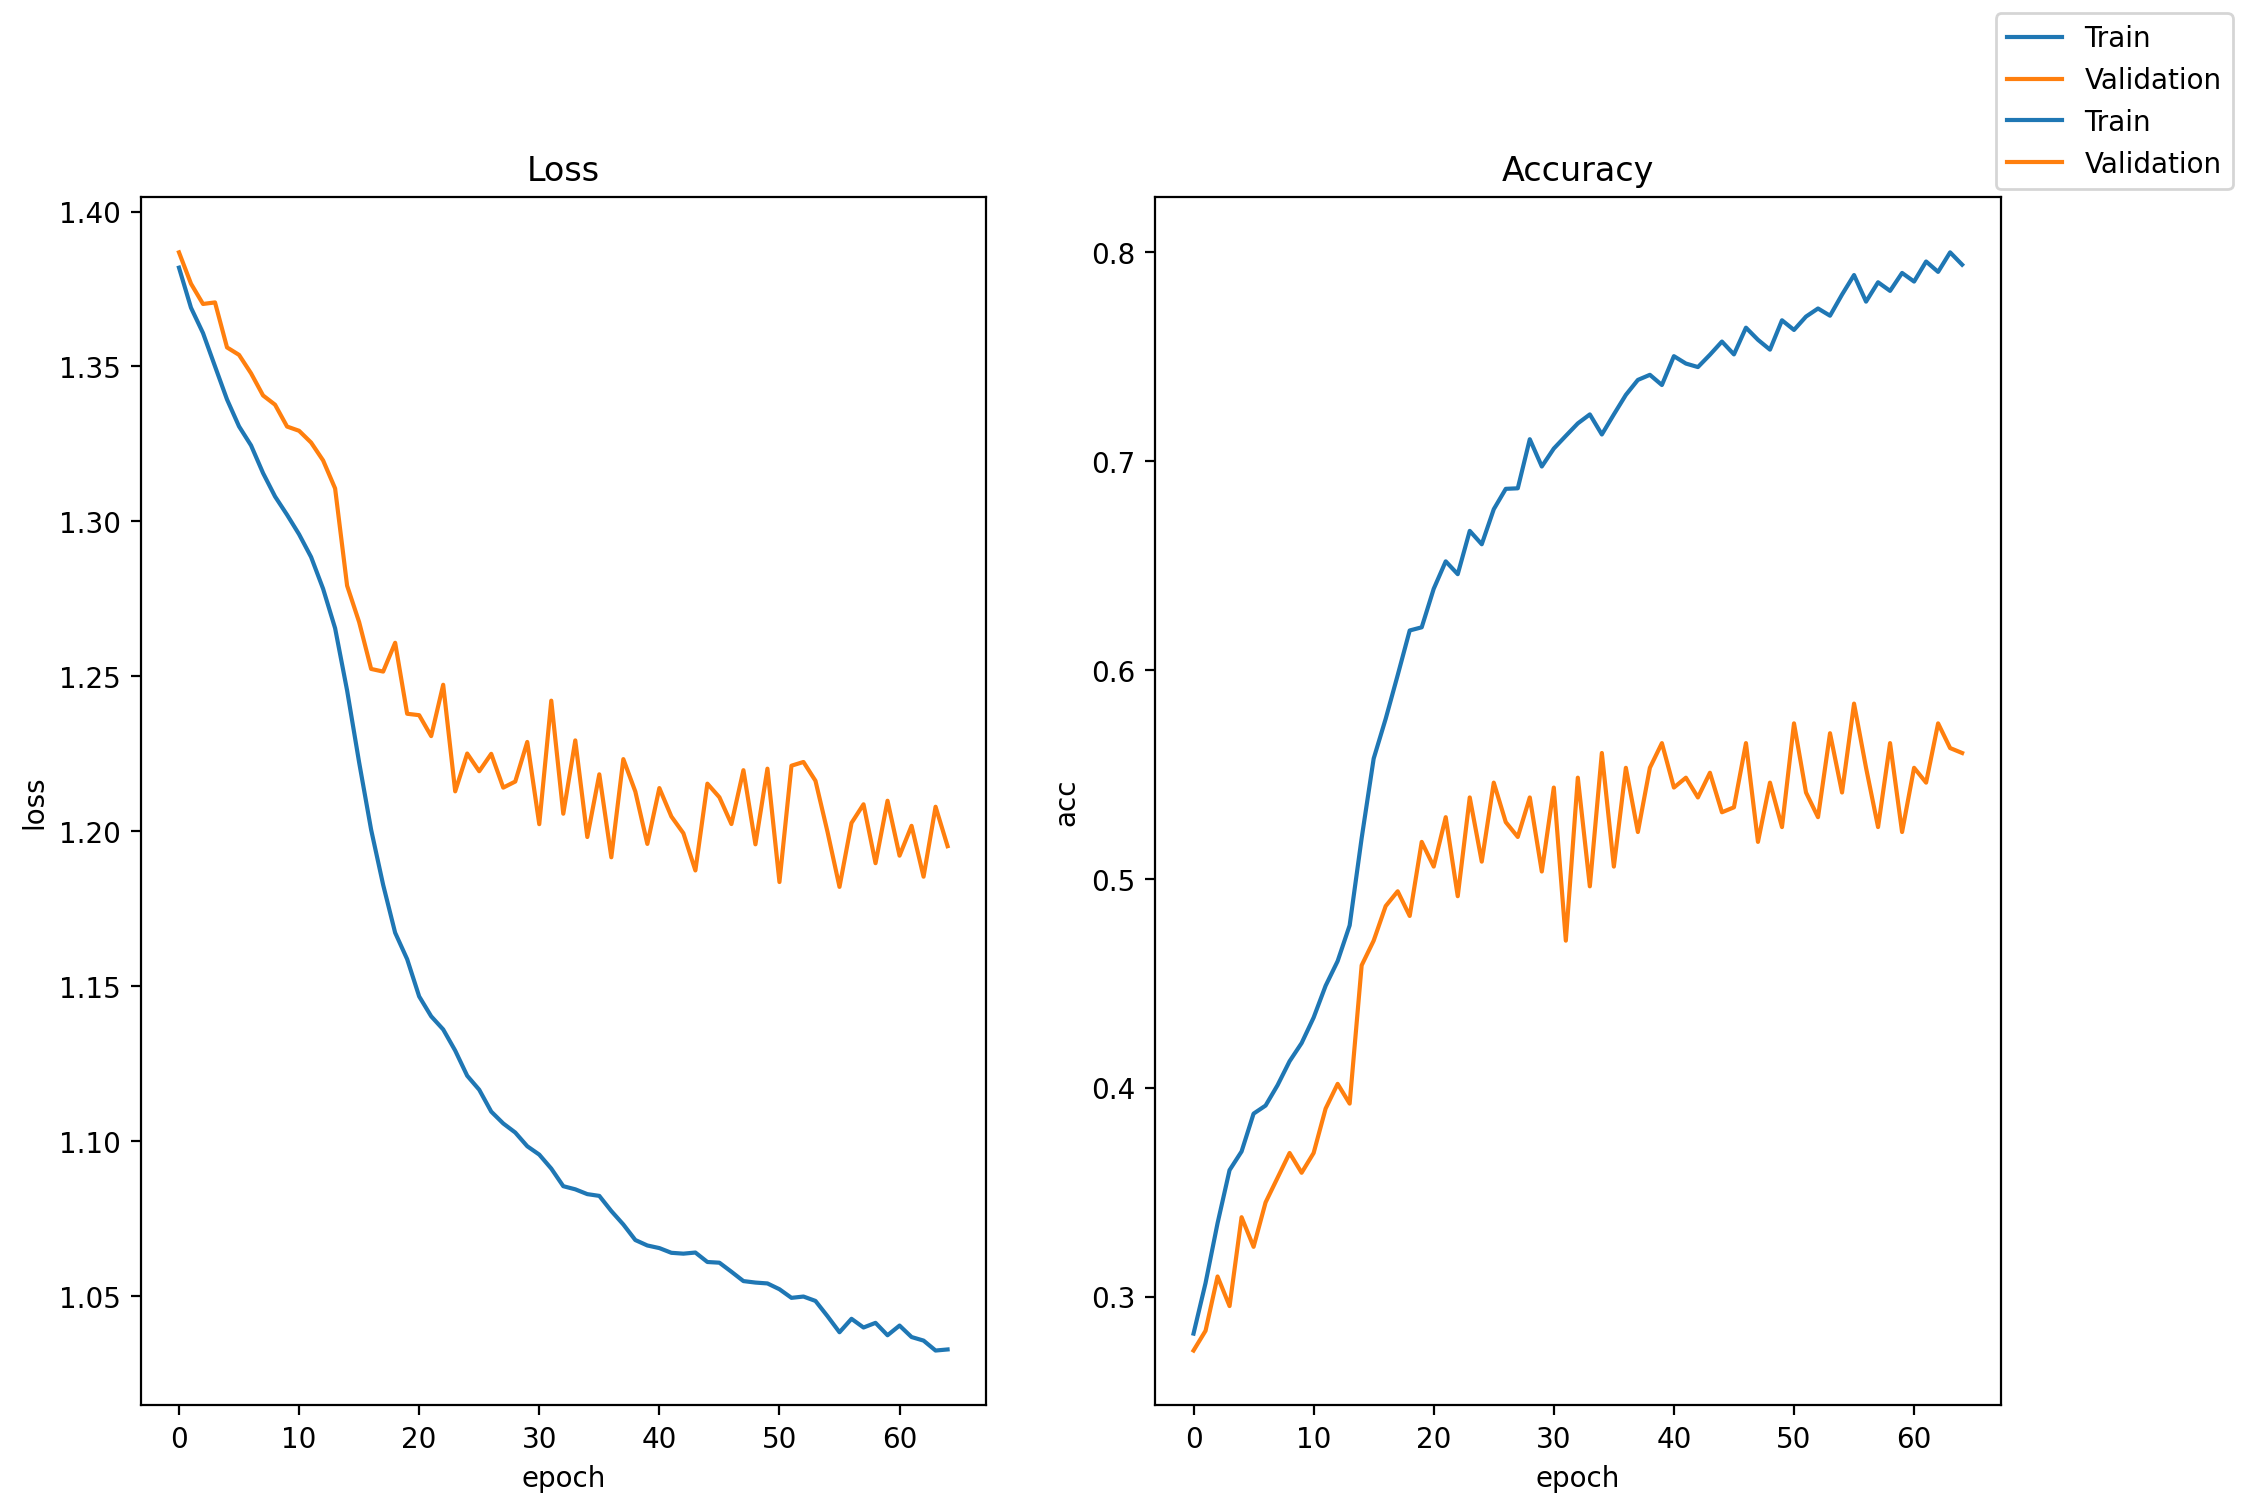

The maximum of the validation is: 0.5839243498817966


In [17]:
model = EEGCNNc3(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 65,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

## EEGCNN3 (maxpool)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.435578
0	1.389654	0.270805	1.390030	0.269504	
--Iter 49	1.363610
1	1.367724	0.312753	1.378010	0.276596	
--Iter 49	1.360166
2	1.348124	0.367419	1.367058	0.319149	
--Iter 49	1.293680
3	1.334048	0.390162	1.347837	0.366430	
--Iter 49	1.302133
4	1.311472	0.432951	1.334096	0.368794	
--Iter 49	1.251298
5	1.294691	0.459316	1.318304	0.404255	
--Iter 49	1.225884
6	1.277226	0.484501	1.312801	0.404255	
--Iter 49	1.283206
7	1.271892	0.479784	1.309993	0.413712	
--Iter 49	1.231542
8	1.259164	0.501937	1.313393	0.390071	
--Iter 49	1.297935
9	1.251154	0.525185	1.321220	0.382979	
--Iter 49	1.249886
10	1.246575	0.510782	1.300789	0.427896	
--Iter 49	1.212910
11	1.240724	0.512719	1.313965	0.397163	
--Iter 49	1.228909
12	1.238271	0.529228	1.296750	0.411348	
--Iter 49	1.323072
13	1.233401	0.532092	1.301427	0.423168	
--Iter 49	1.271890
14	1.227261	0.535883	1.304181	0.404255	
--Iter 49	1.181668
15	1.225397	0.547591	1.290598	0.449173	
-

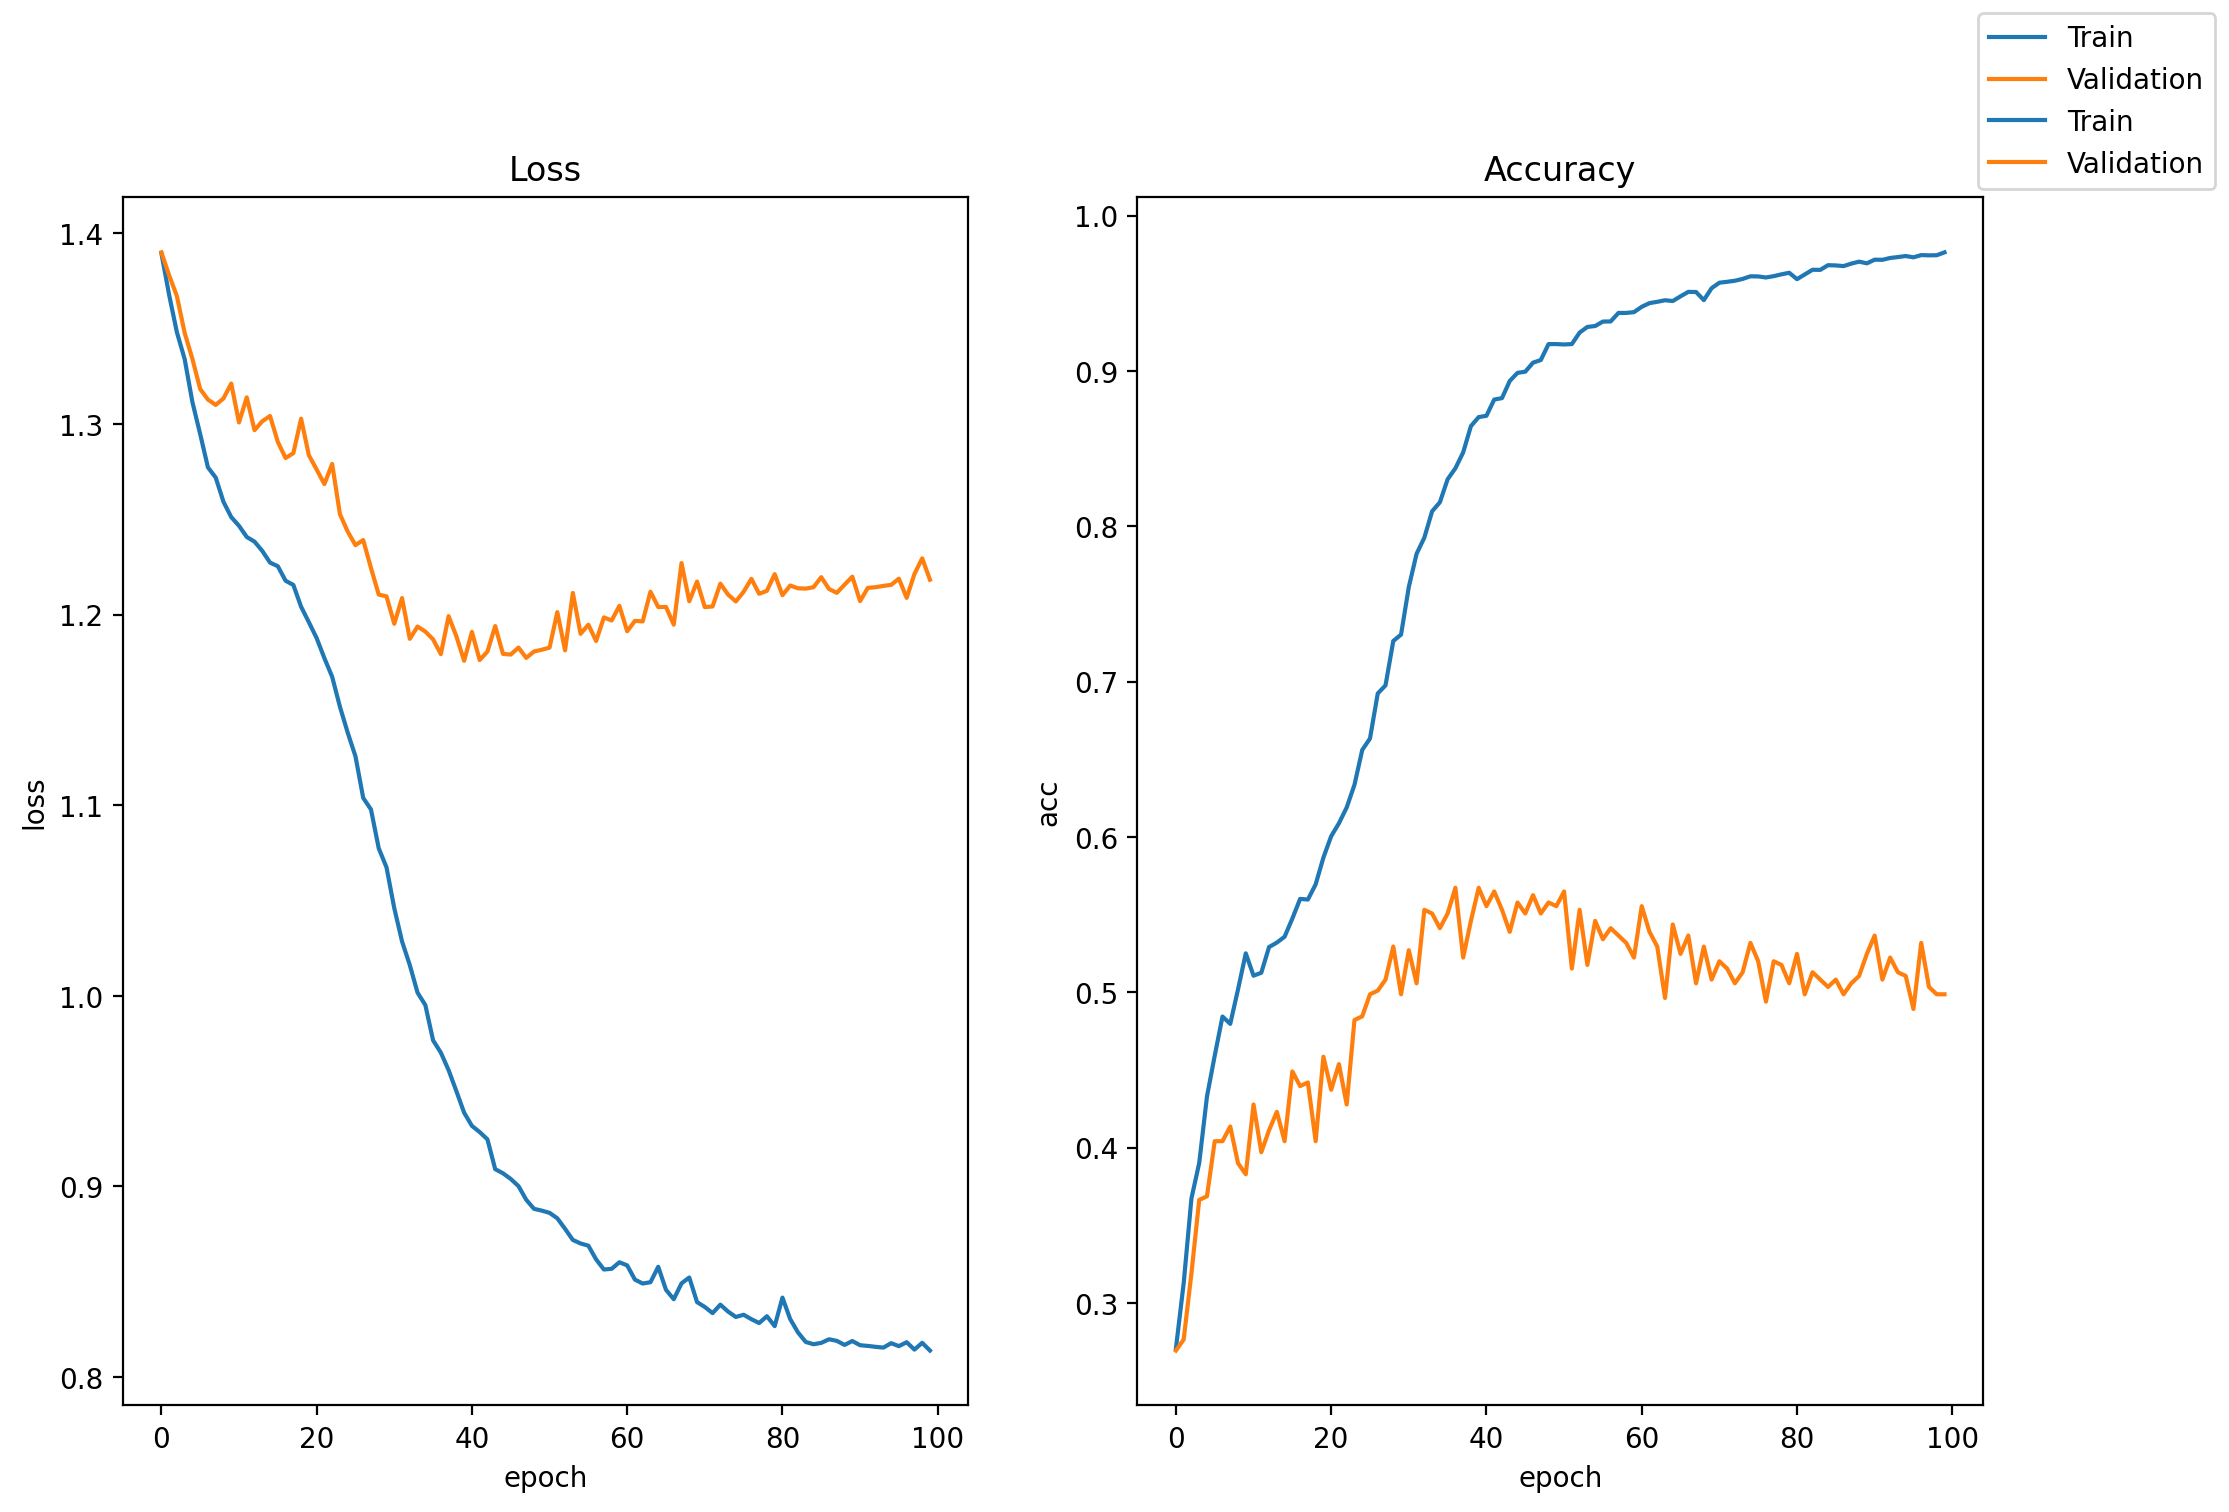

The maximum of the validation is: 0.5673758865248227


In [15]:
model = EEGCNNc3(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 100,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

### Square avg log on last pool 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.388664
0	1.394334	0.258844	1.374595	0.304965	
--Iter 49	1.364698
1	1.348412	0.339201	1.347443	0.354610	
--Iter 49	1.291287
2	1.317954	0.409535	1.346933	0.338061	
--Iter 49	1.311563
3	1.285516	0.458726	1.325777	0.371158	
--Iter 49	1.145374
4	1.260414	0.483238	1.310991	0.404255	
--Iter 49	1.271816
5	1.224730	0.540937	1.298972	0.408983	
--Iter 49	1.256469
6	1.199495	0.572102	1.281445	0.460993	
--Iter 49	1.174928
7	1.179686	0.583558	1.270440	0.446809	
--Iter 49	1.192319
8	1.150219	0.620030	1.260262	0.465721	
--Iter 49	1.081244
9	1.123569	0.656082	1.238984	0.496454	
--Iter 49	1.121767
10	1.103018	0.681941	1.239000	0.486998	
--Iter 49	1.068105
11	1.086774	0.709232	1.228717	0.517730	
--Iter 49	1.241444
12	1.071418	0.719424	1.227718	0.515366	
--Iter 49	1.056713
13	1.058841	0.734501	1.229599	0.496454	
--Iter 49	1.081572
14	1.050457	0.746462	1.219829	0.515366	
--Iter 49	1.050436
15	1.040466	0.753875	1.213826	0.505910	
-

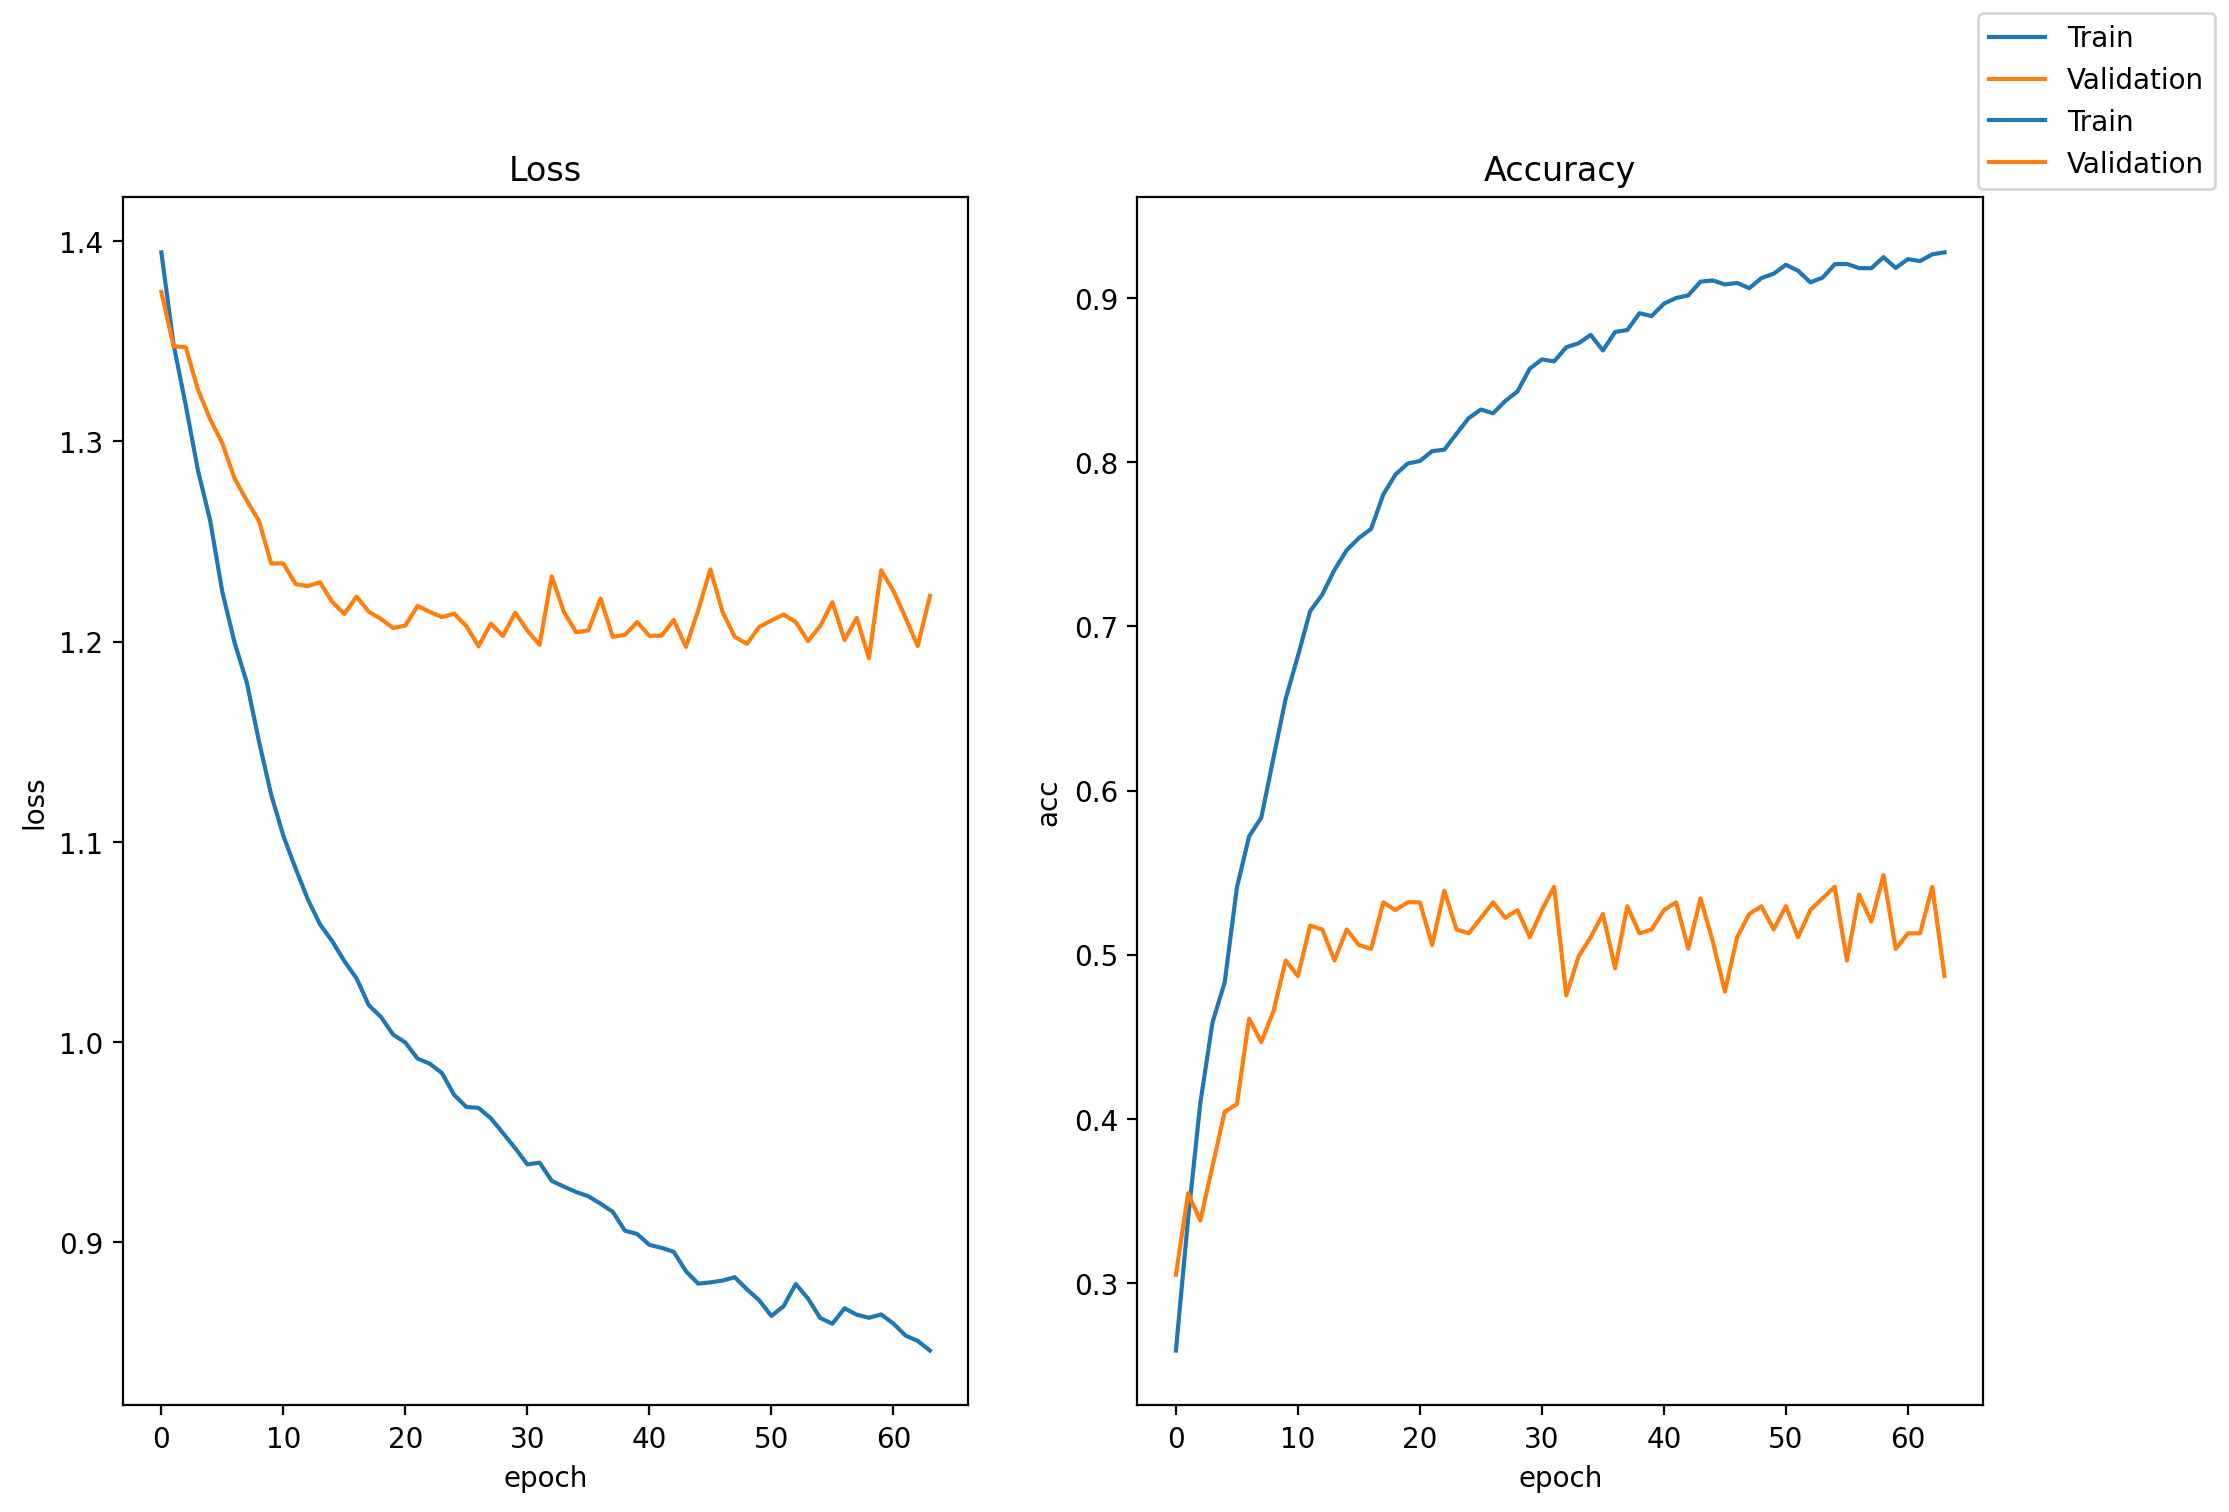

The maximum of the validation is: 0.5484633569739953


In [22]:
model = EEGCNNc3(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 64,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

## EEGCNN3 (maxpool with square and log) (Poor performance)



In [21]:
model = EEGCNNc3(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 64,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.415816
0	1.387202	0.285546	1.369377	0.300236	
--Iter 49	1.352412
1	1.336790	0.384602	1.352415	0.312057	
--Iter 49	1.339344
2	1.309515	0.418127	1.329573	0.368794	
--Iter 49	1.338562
3	1.271745	0.470350	1.340748	0.359338	
--Iter 49	1.308498
4	1.252381	0.516931	1.331153	0.361702	
--Iter 49	1.331567
5	1.235795	0.539505	1.317244	0.378251	
--Iter 49	1.206025
6	1.220495	0.559383	1.329041	0.375887	
--Iter 49	1.278826
7	1.211736	0.566880	1.314405	0.380615	
--Iter 49	1.179267
8	1.196860	0.595687	1.320963	0.380615	
--Iter 49	1.197240
9	1.180797	0.635613	1.310998	0.401891	
--Iter 49	1.201644
10	1.169226	0.630812	1.310203	0.375887	
--Iter 49	1.128439
11	1.165691	0.645637	1.307446	0.392435	
--Iter 49	1.112435
12	1.155941	0.654228	1.298404	0.420804	
--Iter 49	1.168681
13	1.142256	0.667790	1.311685	0.392435	
--Iter 49	1.000624
14	1.130216	0.694997	1.294476	0.427896	
--Iter 49	1.006109
15	1.121426	0.696176	1.296856	0.411348	
-

KeyboardInterrupt: 

## CNN3 2 layer fc connect


### max pool 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.378523
0	1.388203	0.274259	1.383980	0.245863	
--Iter 49	1.394917
1	1.381177	0.267689	1.385731	0.257683	
--Iter 49	1.366282
2	1.372619	0.296159	1.375114	0.286052	
--Iter 49	1.383256
3	1.364596	0.338022	1.386662	0.243499	
--Iter 49	1.341720
4	1.357799	0.339286	1.381058	0.295508	
--Iter 49	1.338259
5	1.357064	0.352173	1.389220	0.295508	
--Iter 49	1.361617
6	1.349598	0.364724	1.367642	0.373522	
--Iter 49	1.353440
7	1.335873	0.375337	1.358405	0.366430	
--Iter 49	1.341202
8	1.325054	0.417958	1.359285	0.335697	
--Iter 49	1.338323
9	1.320987	0.396395	1.359194	0.356974	
--Iter 49	1.349614
10	1.311700	0.409282	1.345743	0.352246	
--Iter 49	1.285621
11	1.304212	0.413157	1.347707	0.371158	
--Iter 49	1.334773
12	1.285780	0.451314	1.332259	0.361702	
--Iter 49	1.315870
13	1.274362	0.472877	1.315747	0.408983	
--Iter 49	1.199655
14	1.256403	0.490650	1.305859	0.420804	
--Iter 49	1.190491
15	1.238524	0.512551	1.305959	0.444444	
-

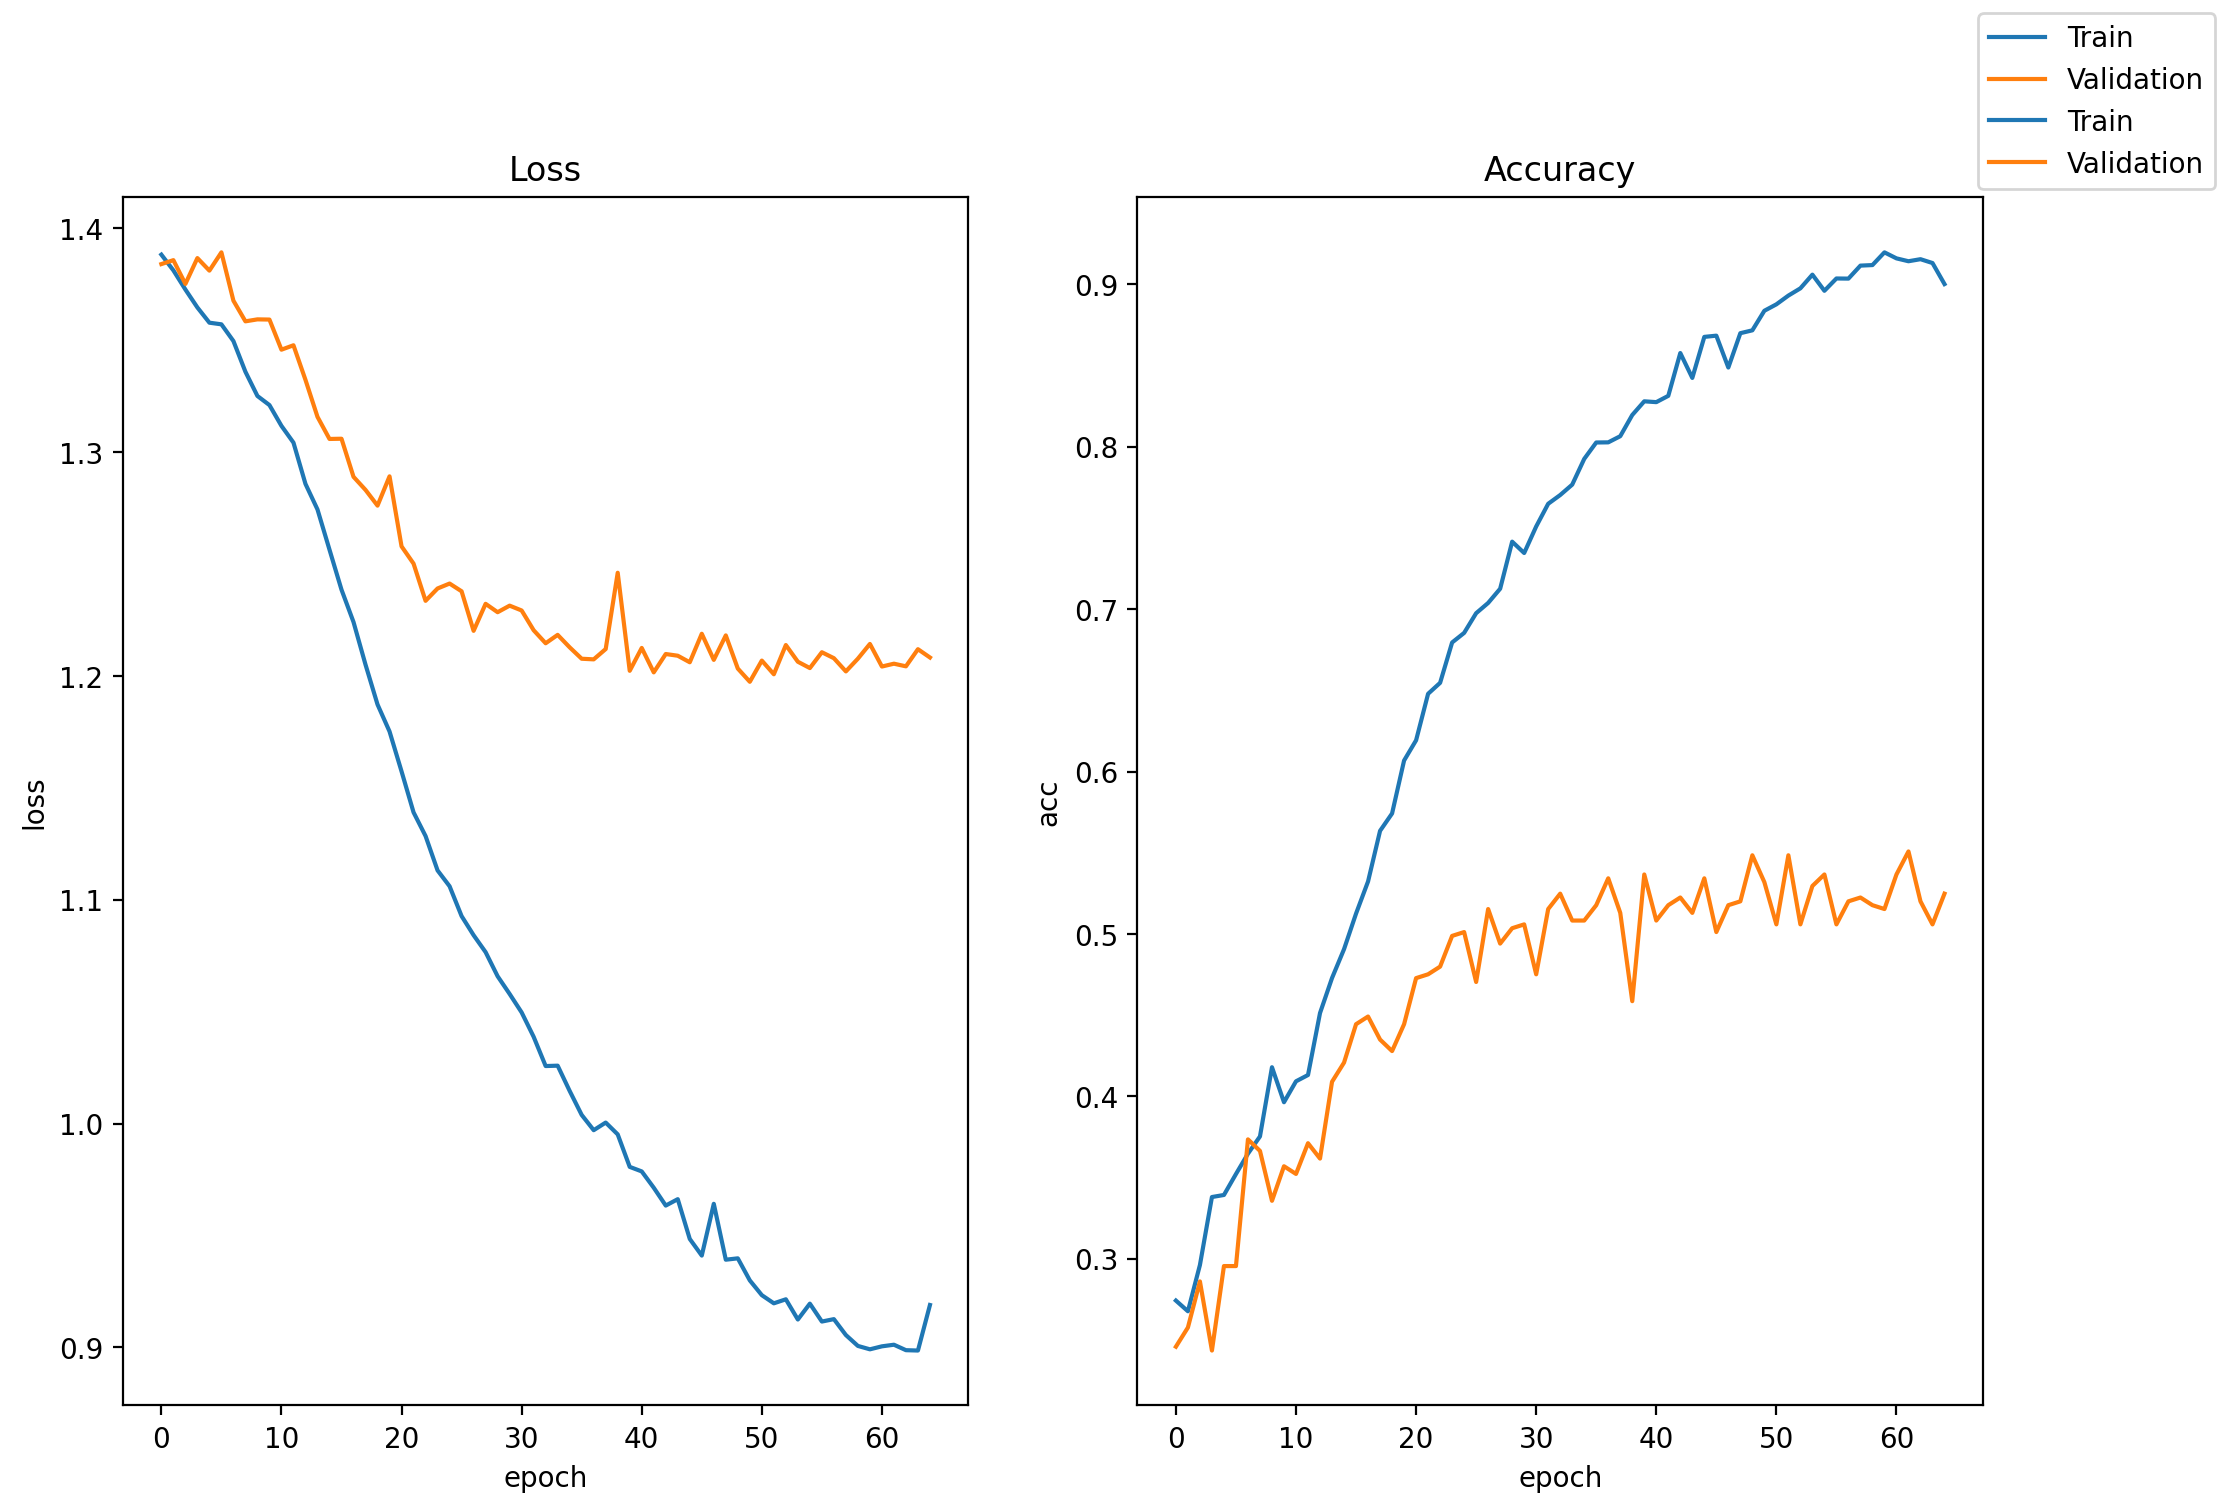

The maximum of the validation is: 0.5508274231678487


In [23]:
model = EEGCNNc3(1,4,activation='leaky_relu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 65,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))


### Avg pool 


In [1]:
model = EEGCNNc3(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 65,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

NameError: name 'EEGCNNc3' is not defined

### 1: max 2: avg 3: avg 


Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.357188
0	1.383418	0.285462	1.383633	0.281324	
--Iter 49	1.386519
1	1.364575	0.334653	1.373827	0.283688	
--Iter 49	1.342511
2	1.347222	0.354784	1.356444	0.323877	
--Iter 49	1.387917
3	1.331934	0.382834	1.349794	0.335697	
--Iter 49	1.357269
4	1.324818	0.376095	1.338054	0.345154	
--Iter 49	1.353641
5	1.319775	0.388140	1.349719	0.321513	
--Iter 49	1.269299
6	1.320707	0.395889	1.336933	0.380615	
--Iter 49	1.272312
7	1.319339	0.402544	1.344503	0.361702	
--Iter 49	1.398427
8	1.311152	0.420148	1.333690	0.390071	
--Iter 49	1.300673
9	1.308673	0.419306	1.341340	0.352246	
--Iter 49	1.297045
10	1.301424	0.433036	1.322989	0.397163	
--Iter 49	1.308007
11	1.288494	0.459990	1.323597	0.387707	
--Iter 49	1.291623
12	1.271313	0.474899	1.295652	0.416076	
--Iter 49	1.226303
13	1.240074	0.525438	1.276587	0.475177	
--Iter 49	1.296836
14	1.219188	0.551634	1.277469	0.456265	
--Iter 49	1.168292
15	1.207331	0.546917	1.258231	0.456265	
-

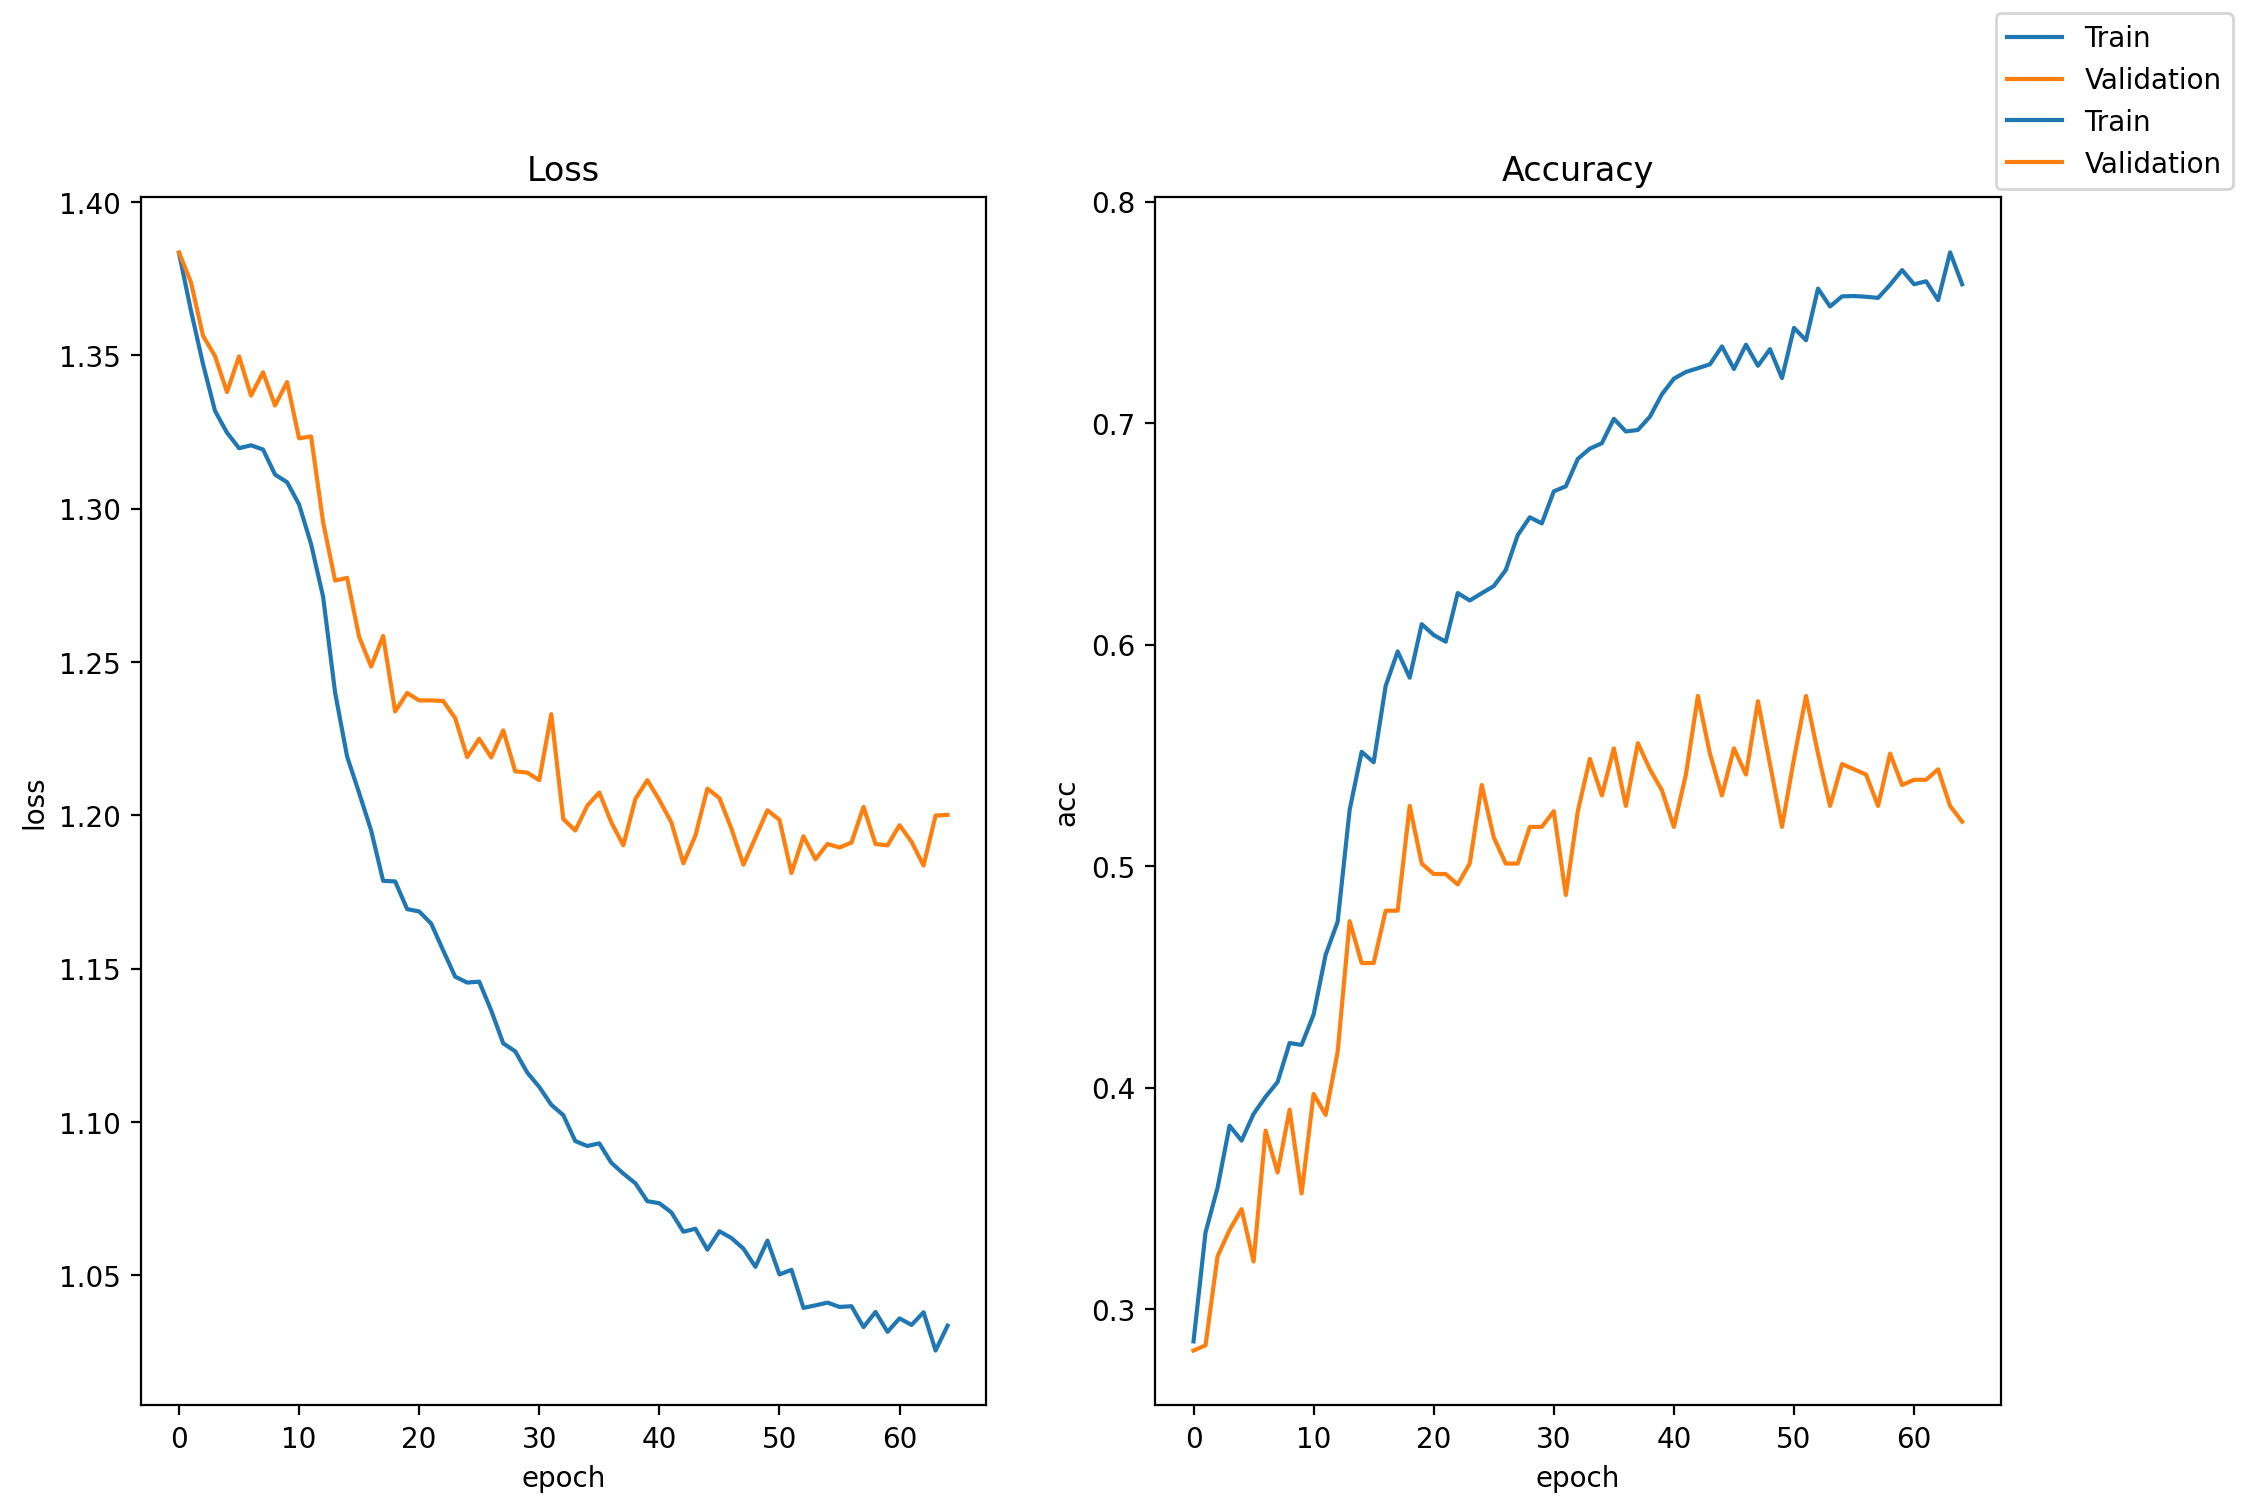

The maximum of the validation is: 0.5768321513002365


In [28]:
model = EEGCNNc3(1,4,activation='elu').to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4, 
    'epoch_num': 65,
    #'transform': 'shift_positive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

In [93]:
model = ShallowConv(1,4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 40, 22, 976]           1,040
            Linear-2              [-1, 976, 40]          35,240
          Identity-3              [-1, 976, 40]               0
         AvgPool1d-4               [-1, 40, 61]               0
            Linear-5                    [-1, 4]           9,764
           Softmax-6                    [-1, 4]               0
Total params: 46,044
Trainable params: 46,044
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 7.17
Params size (MB): 0.18
Estimated Total Size (MB): 7.43
----------------------------------------------------------------
